# *SOURCE*
https://www.youtube.com/watch?v=doDUihpj6ro&t=7339s
https://github.com/nicknochnack/ActionDetectionforSignLanguage

## **Install Dependency**

In [76]:
! pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python mediapipe 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [79]:
! git clone https://github.com/nickbp760/Tutorial_LSTM_MP.git

fatal: destination path 'Tutorial_LSTM_MP' already exists and is not an empty directory.


In [80]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    

## **Create Labels and Features**

The label map containts the action label

In [81]:
# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])
label_map = {label:num for num, label in enumerate(actions)}

In [82]:
label_map

{'LirikKanan': 0,
 'LirikKiri': 1,
 'MenolehKanan': 2,
 'MenolehKiri': 3,
 'Normal': 4,
 'TutupMata': 5}

## **DEFINE X (Input) and y (Output)**

In [83]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Real_TrainMediapipe') 

# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 50

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []

        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

X_train = np.array(sequences)
print(X_train.shape)
y_train = to_categorical(labels).astype(int)
print(y_train.shape)

(180, 50, 1434)
(180, 6)


In [84]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Real_ValidMediapipe') 

# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])

# Thirty videos worth of data
no_sequences = 3

# Videos are going to be 30 frames in length
sequence_length = 50

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []

        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

X_Valid = np.array(sequences)
print(X_Valid.shape)
y_Valid = to_categorical(labels).astype(int)
print(y_Valid.shape)

(18, 50, 1434)
(18, 6)


In [85]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Real_TestMediapipe') 

# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 50

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []

        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

X_test = np.array(sequences)
print(X_test.shape)
y_test = to_categorical(labels).astype(int)
print(y_test.shape)

(180, 50, 1434)
(180, 6)


## **Build, Train and Test Neural Network**

In [86]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [87]:
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='tanh', input_shape=(50,1434)))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(128, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [88]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.optimizer.lr.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [89]:
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_Valid, y_Valid))

Epoch 1/250
6/6 [==============================] - 11s 441ms/step - loss: 1.8044 - categorical_accuracy: 0.1833 - val_loss: 1.7909 - val_categorical_accuracy: 0.1667
Epoch 2/250
6/6 [==============================] - 0s 33ms/step - loss: 1.7862 - categorical_accuracy: 0.1778 - val_loss: 1.7947 - val_categorical_accuracy: 0.1667
Epoch 3/250
6/6 [==============================] - 0s 44ms/step - loss: 1.7851 - categorical_accuracy: 0.1833 - val_loss: 1.7889 - val_categorical_accuracy: 0.2222
Epoch 4/250
6/6 [==============================] - 0s 47ms/step - loss: 1.7846 - categorical_accuracy: 0.1556 - val_loss: 1.7859 - val_categorical_accuracy: 0.1667
Epoch 5/250
6/6 [==============================] - 0s 42ms/step - loss: 1.7730 - categorical_accuracy: 0.1889 - val_loss: 1.7805 - val_categorical_accuracy: 0.1667
Epoch 6/250
6/6 [==============================] - 0s 55ms/step - loss: 1.7696 - categorical_accuracy: 0.2444 - val_loss: 1.7766 - val_categorical_accuracy: 0.1111
Epoch 7/250
6/

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_27 (GRU)                (None, 50, 128)           600576    
                                                                 
 dropout_18 (Dropout)        (None, 50, 128)           0         
                                                                 
 gru_28 (GRU)                (None, 50, 64)            37248     
                                                                 
 dropout_19 (Dropout)        (None, 50, 64)            0         
                                                                 
 gru_29 (GRU)                (None, 128)               74496     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 32)               

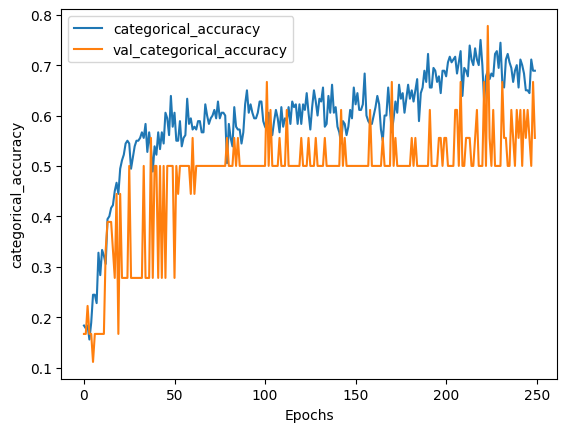

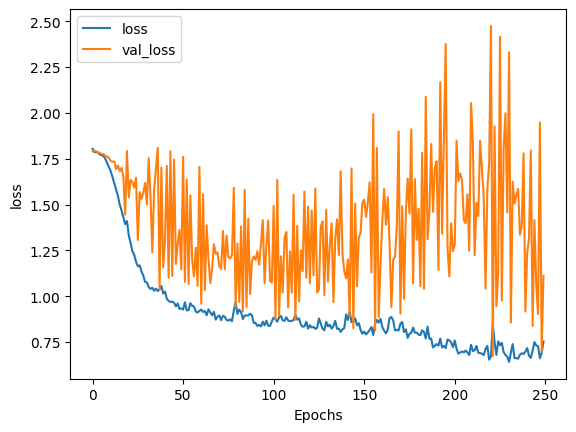

In [90]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionGRUNikoCheatDataReal_ReportGRUMediaPipe.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

In [91]:
y_test_predict = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_test_predict, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

0.7277777777777777

## **Build, Train and Test Neural Network 2**

In [92]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [93]:
model = Sequential()
model.add(GRU(256, return_sequences=True, activation='tanh', input_shape=(50,1434)))
model.add(Dropout(0.2))
model.add(GRU(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [94]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.optimizer.lr.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [95]:
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_Valid, y_Valid))

Epoch 1/250
6/6 [==============================] - 6s 220ms/step - loss: 1.8139 - categorical_accuracy: 0.1778 - val_loss: 1.7984 - val_categorical_accuracy: 0.1667
Epoch 2/250
6/6 [==============================] - 0s 31ms/step - loss: 1.7900 - categorical_accuracy: 0.1889 - val_loss: 1.7927 - val_categorical_accuracy: 0.1667
Epoch 3/250
6/6 [==============================] - 0s 29ms/step - loss: 1.7868 - categorical_accuracy: 0.2056 - val_loss: 1.7894 - val_categorical_accuracy: 0.1667
Epoch 4/250
6/6 [==============================] - 0s 28ms/step - loss: 1.7807 - categorical_accuracy: 0.1778 - val_loss: 1.7800 - val_categorical_accuracy: 0.1667
Epoch 5/250
6/6 [==============================] - 0s 24ms/step - loss: 1.7769 - categorical_accuracy: 0.1333 - val_loss: 1.7669 - val_categorical_accuracy: 0.1667
Epoch 6/250
6/6 [==============================] - 0s 25ms/step - loss: 1.7625 - categorical_accuracy: 0.1944 - val_loss: 1.7724 - val_categorical_accuracy: 0.3333
Epoch 7/250
6/6

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_30 (GRU)                (None, 50, 256)           1299456   
                                                                 
 dropout_20 (Dropout)        (None, 50, 256)           0         
                                                                 
 gru_31 (GRU)                (None, 50, 128)           148224    
                                                                 
 dropout_21 (Dropout)        (None, 50, 128)           0         
                                                                 
 gru_32 (GRU)                (None, 64)                37248     
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 32)              

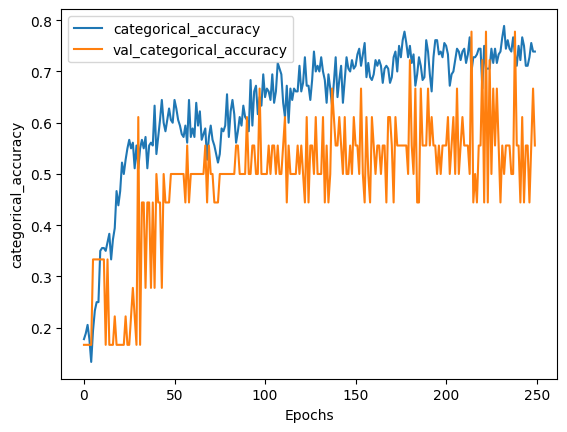

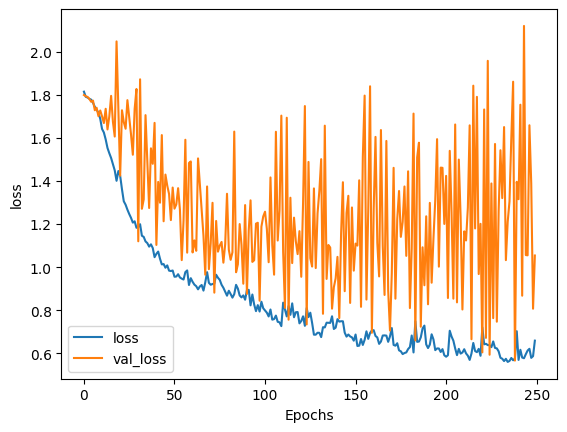

In [96]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionGRUNikoCheatDataReal_ReportGRU2MediaPipe.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

In [97]:
y_test_predict = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_test_predict, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

0.7222222222222222

## **Build, Train and Test Neural Network 3**

In [98]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [99]:
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='tanh', input_shape=(50,1434)))
model.add(Dropout(0.2))
model.add(GRU(256, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(128, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [100]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.optimizer.lr.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [101]:
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_Valid, y_Valid))

Epoch 1/250
6/6 [==============================] - 6s 207ms/step - loss: 1.8048 - categorical_accuracy: 0.1278 - val_loss: 1.7805 - val_categorical_accuracy: 0.1667
Epoch 2/250
6/6 [==============================] - 0s 29ms/step - loss: 1.7751 - categorical_accuracy: 0.2056 - val_loss: 1.7708 - val_categorical_accuracy: 0.1667
Epoch 3/250
6/6 [==============================] - 0s 29ms/step - loss: 1.7585 - categorical_accuracy: 0.2611 - val_loss: 1.7626 - val_categorical_accuracy: 0.3333
Epoch 4/250
6/6 [==============================] - 0s 27ms/step - loss: 1.7500 - categorical_accuracy: 0.2444 - val_loss: 1.7535 - val_categorical_accuracy: 0.3333
Epoch 5/250
6/6 [==============================] - 0s 24ms/step - loss: 1.7164 - categorical_accuracy: 0.3778 - val_loss: 1.7254 - val_categorical_accuracy: 0.1667
Epoch 6/250
6/6 [==============================] - 0s 23ms/step - loss: 1.6878 - categorical_accuracy: 0.3667 - val_loss: 1.7520 - val_categorical_accuracy: 0.1667
Epoch 7/250
6/6

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_33 (GRU)                (None, 50, 128)           600576    
                                                                 
 dropout_22 (Dropout)        (None, 50, 128)           0         
                                                                 
 gru_34 (GRU)                (None, 50, 256)           296448    
                                                                 
 dropout_23 (Dropout)        (None, 50, 256)           0         
                                                                 
 gru_35 (GRU)                (None, 128)               148224    
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)              

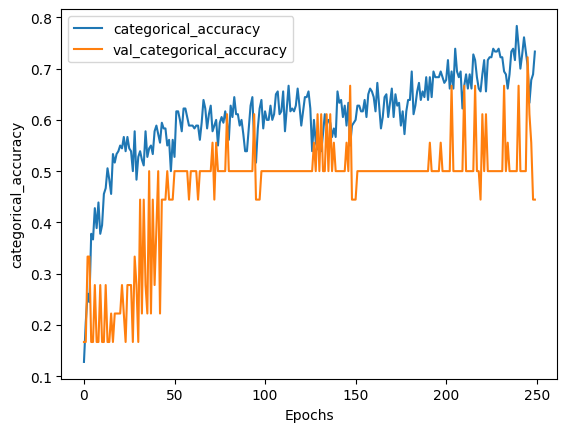

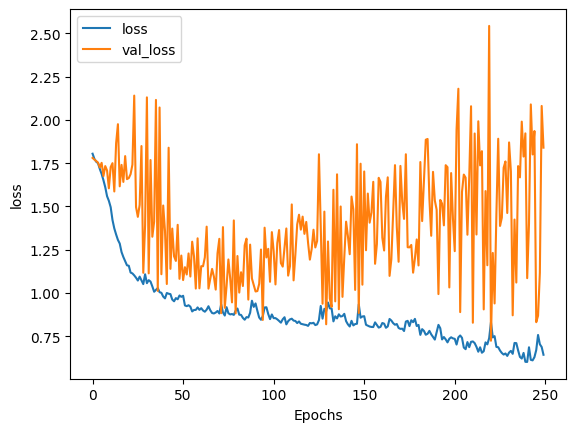

In [102]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionGRUNikoCheatDataReal_ReportGRU3MediaPipe.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

In [103]:
y_test_predict = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_test_predict, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

0.7222222222222222